In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [403]:
data = pd.read_csv('heart.csv')

In [305]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [30]:
data.shape

(303, 14)

In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [34]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


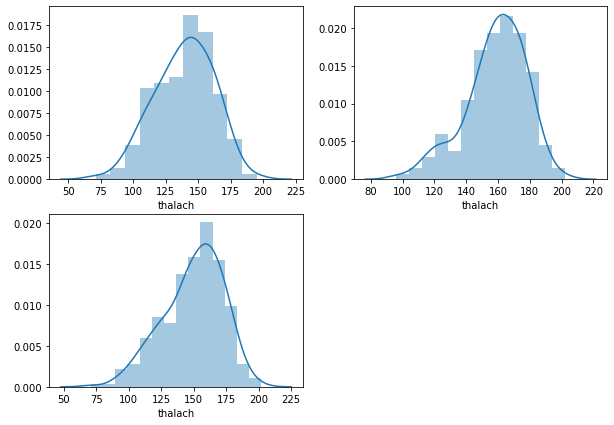

In [332]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
sns.distplot(data[data['target'] == 0]['thalach'])
plt.subplot(2, 2, 2)
sns.distplot(data[data['target'] == 1]['thalach'])
plt.subplot(2, 2, 3)
sns.distplot(data['thalach'])

In [312]:
fig = go.Figure(data=[go.Pie(labels=data['target'])])
fig.show()

In [313]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Значения перменных
- age: Возраст в годах
- sex: Пол (1 = мужской, 0 = женский)
- cp: Уровень боли (1: типичная стенокардия, 2: атипичная стенокардия, 3: неангинальная боль, 4: асимптотичная боль)
- trestbps: Давление (милиметр ртутного столба)
- chol: Холестерин мг/дл (милиграмм на децелитр)
- fbs: Уровень сахара в крови натощак мг/дл (> 120 mg/dl, 1 = true, 0 = false)
- restecg: Электрокардиографическое изменение в покое (0 = normal, 1 = Наличие ST-T волн, 2 = Левожелудочковая гипертрофия)
- thalach: Максимальная частота сердечных сокращений у человека
- exang: Стенокардия вызванная физическими упражнениями
- oldpeak: Уровень ST депрессии
- slope: Участок ST (1 - выгнутый, 2 - гладкий, 3 - вогнутый)
- thal: Талассемия (3 = normal, 6 = fixed defect, 7 = reversable defect)
- ca: Количество станозированных (суженных) артерий (0-4)

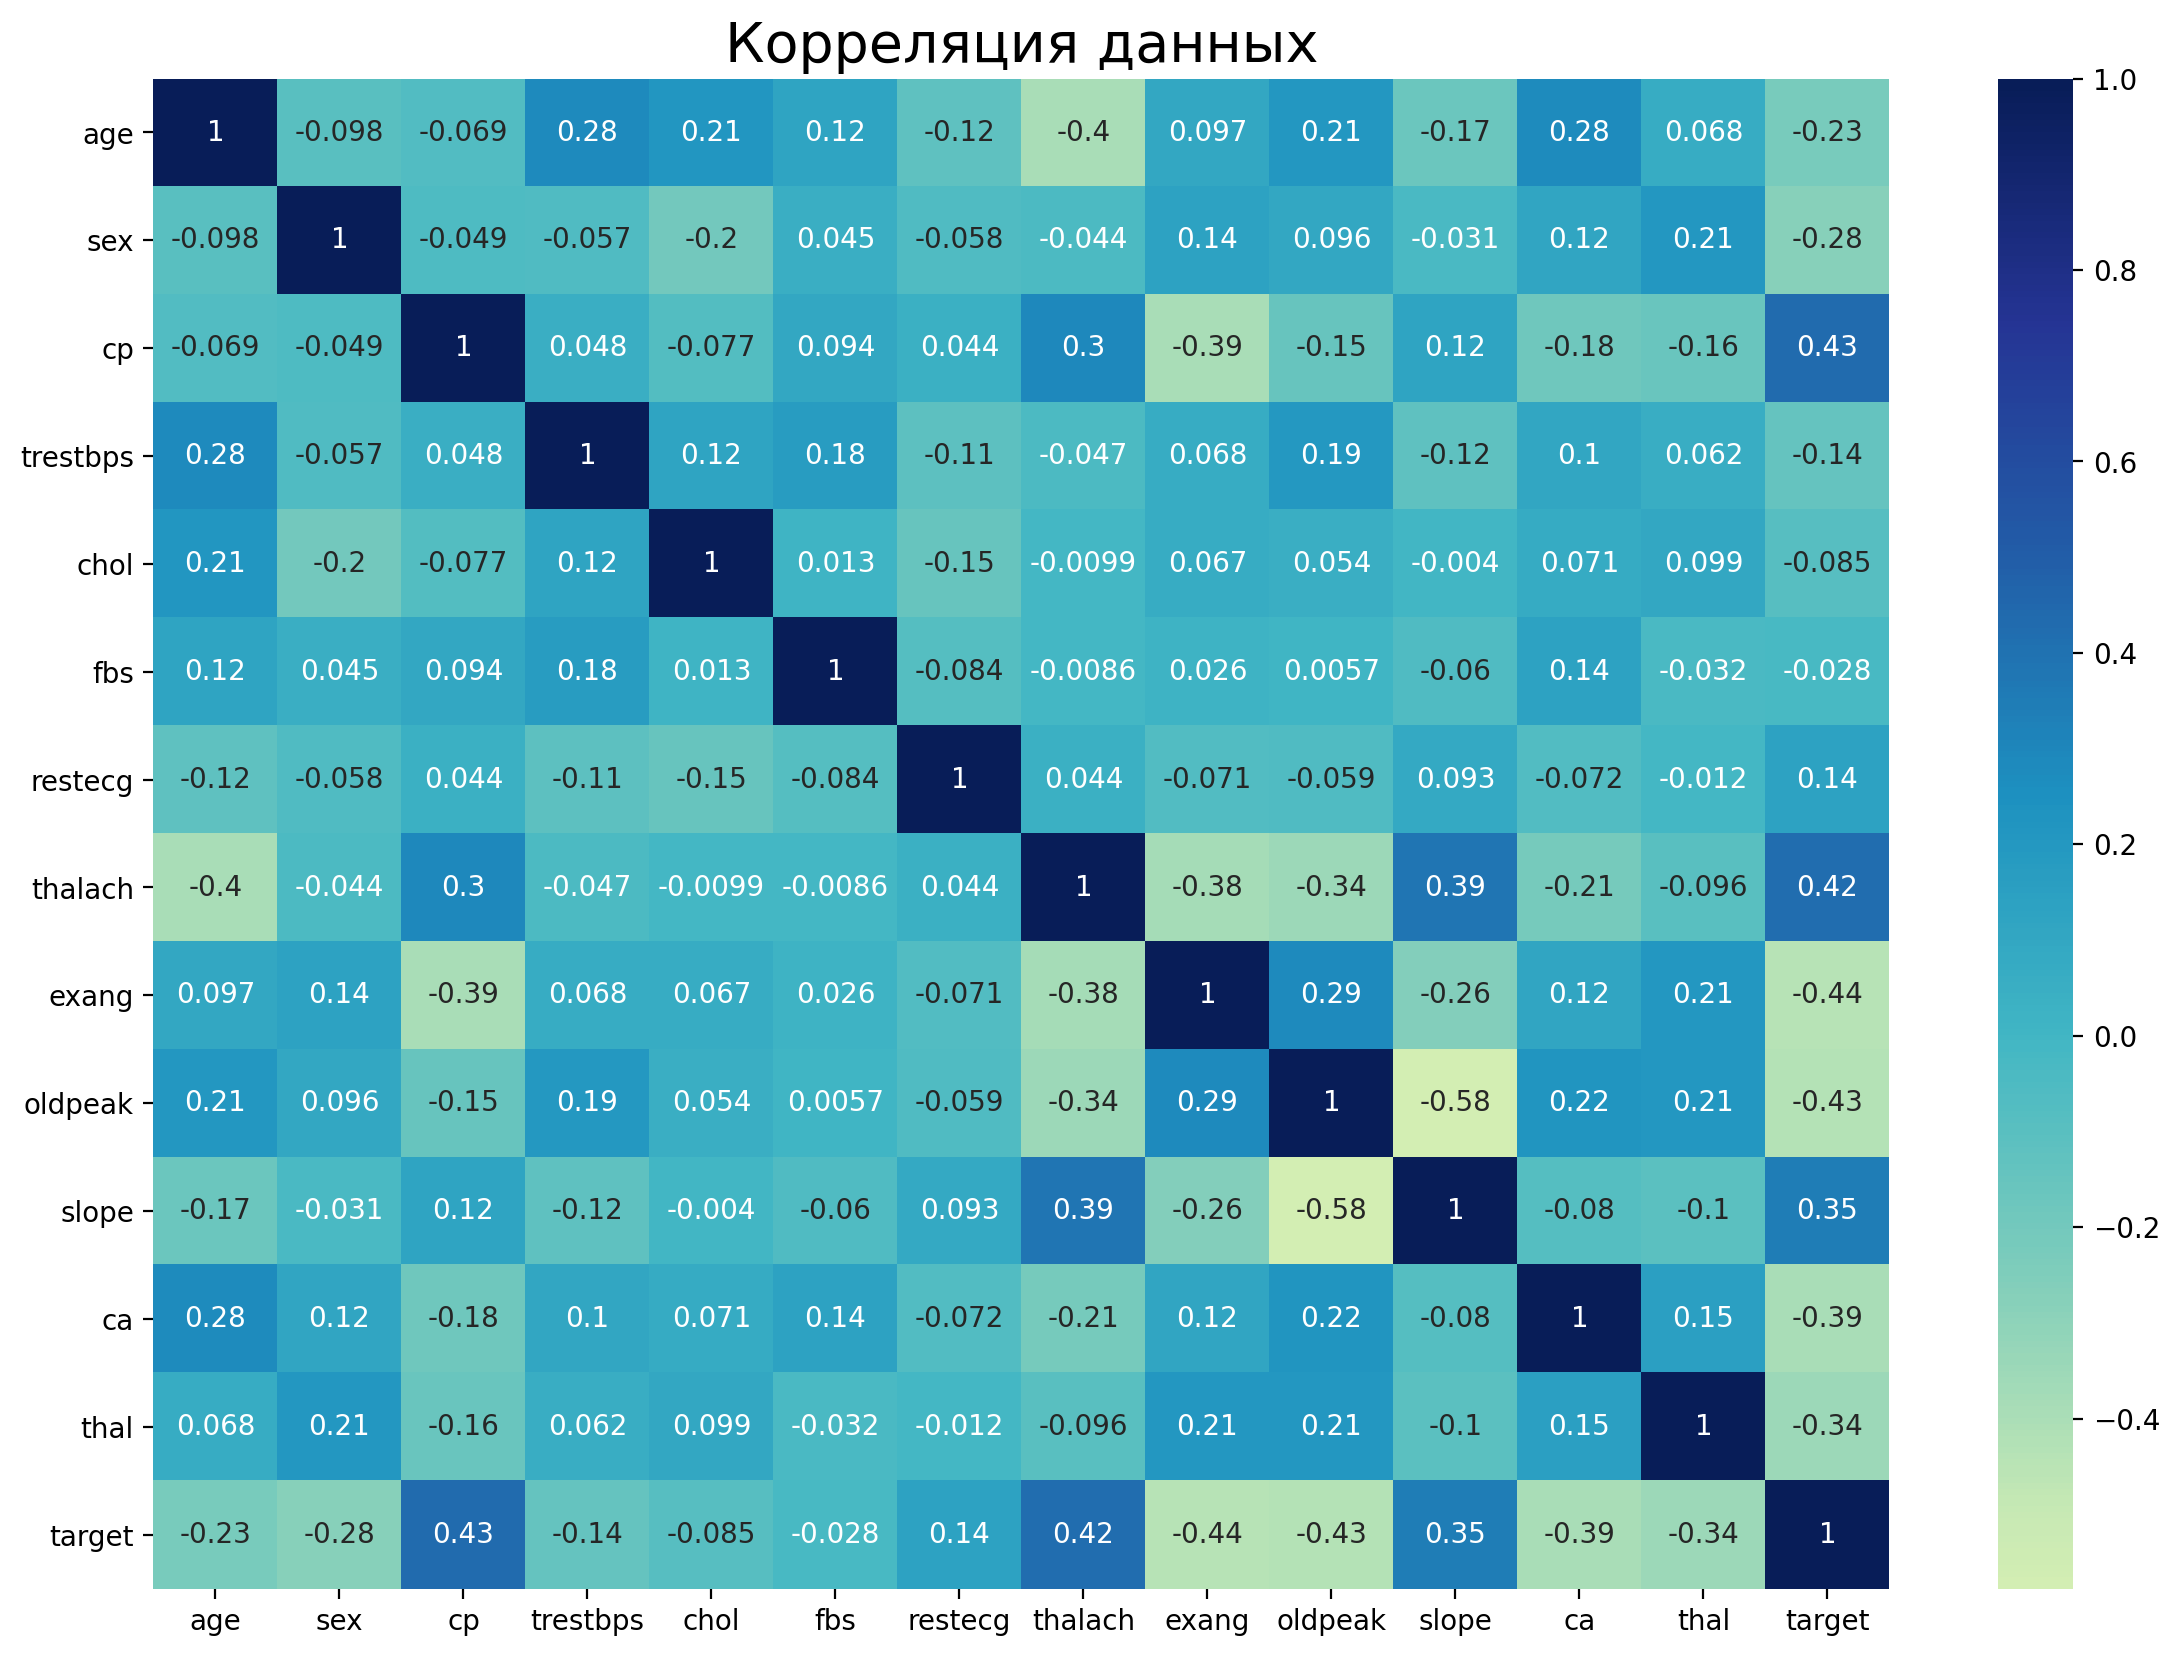

In [42]:

# Plot
plt.figure(figsize=(14,10), dpi= 200)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='YlGnBu', center=0, annot=True)

# Decorations
plt.title('Корреляция данных', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

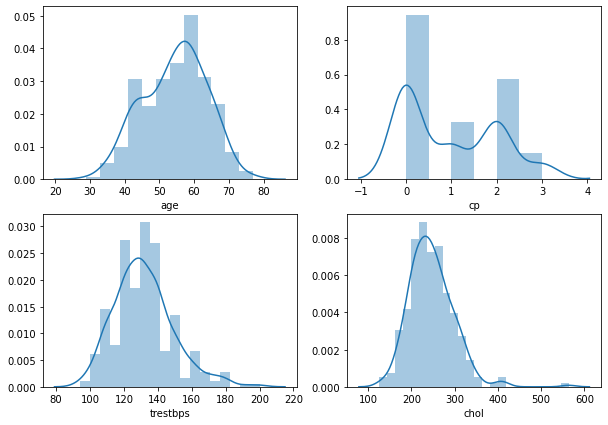

In [54]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.age)
plt.subplot(2, 2, 2)
sns.distplot(data.cp)
plt.subplot(2, 2, 3)
sns.distplot(data.trestbps)
plt.subplot(2, 2, 4)
sns.distplot(data.chol)


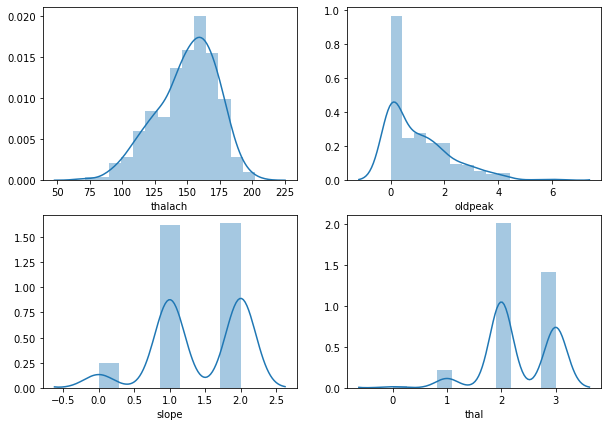

In [55]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.thalach)
plt.subplot(2, 2, 2)
sns.distplot(data.oldpeak)
plt.subplot(2, 2, 3)
sns.distplot(data.slope)
plt.subplot(2, 2, 4)
sns.distplot(data.thal)


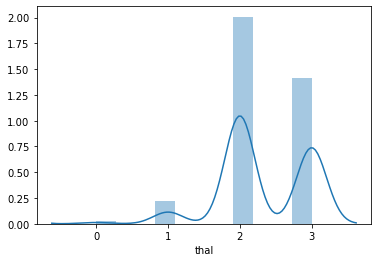

In [50]:
sns.distplot(data.thal)

In [58]:
data.describe().loc['mean']

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
Name: mean, dtype: float64

## Построение модели логистической регрессии

In [404]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = data.drop(columns = {'target'}).columns
scaled_data = pd.DataFrame(scaler.fit_transform(data.drop(columns = {'target'})), columns=names)
scaled_data.describe().loc['mean']

age         0.528465
sex         0.683168
cp          0.322332
trestbps    0.354941
chol        0.274575
fbs         0.148515
restecg     0.264026
thalach     0.600358
exang       0.326733
oldpeak     0.167678
slope       0.699670
ca          0.182343
thal        0.771177
Name: mean, dtype: float64

In [362]:
X = scaled_data
Y = np.array(data['target'])

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = True)

In [365]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()

In [366]:
lrmodel.fit(X_train, y_train)

LogisticRegression()

In [367]:
y_pred = lrmodel.predict(X_test)

In [368]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[20, 10],
       [ 5, 26]], dtype=int64)

In [369]:
metrics.accuracy_score(y_test, y_pred)

0.7540983606557377

In [370]:
metrics.precision_score(y_test, y_pred)

0.7222222222222222

In [371]:
metrics.recall_score(y_test, y_pred)

0.8387096774193549

In [372]:
metrics.f1_score(y_test, y_pred)

0.7761194029850746

In [373]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Text(0.5, 15.0, 'Предсказанные значения')

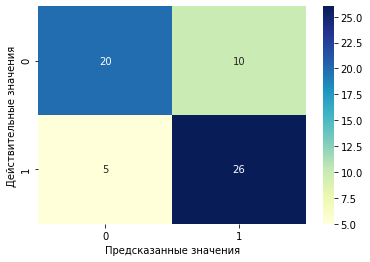

In [374]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names) 
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_pred)), cmap="YlGnBu", annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


## Метод случайных лесов

In [375]:
from sklearn.ensemble import RandomForestClassifier
forestmodel = RandomForestClassifier(n_estimators=10)


In [376]:
forestmodel.fit(X_train, y_train)
estimator = forestmodel.estimators_[1]

In [377]:
y_predforest = forestmodel.predict(X_test)

In [378]:
metrics.accuracy_score(y_test, y_predforest)

0.8032786885245902

In [379]:
metrics.confusion_matrix(y_test, y_predforest)

array([[23,  7],
       [ 5, 26]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

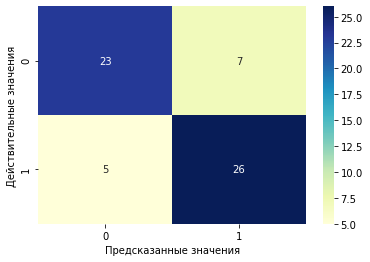

In [380]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_predforest)), cmap="YlGnBu", annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [381]:
feature_names = [i for i in data.drop(columns = {'target'}).columns]

In [382]:
y_train_str = data['target'].astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [383]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                precision = 2, filled = True)



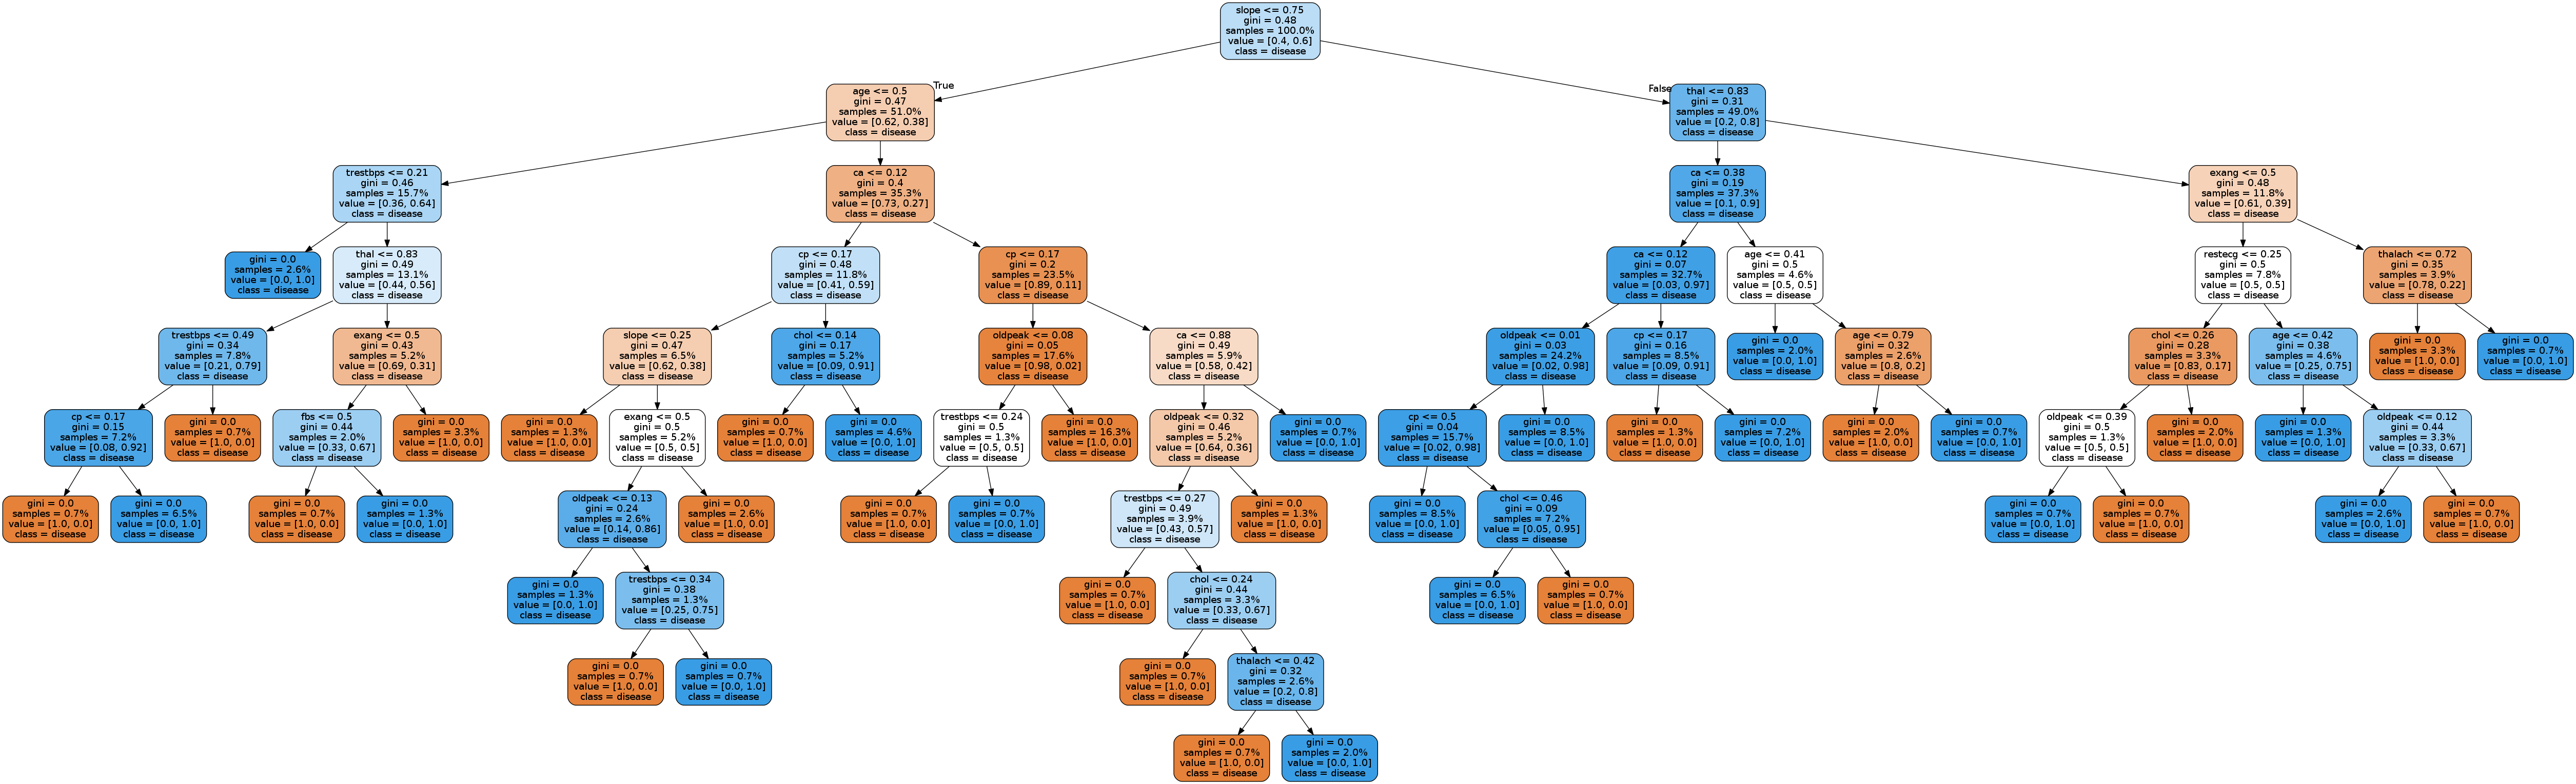

In [385]:
from IPython.display import Image
Image(filename = 'tree_2_.png')

In [386]:
print(classification_report(y_test, y_predforest))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Применим метод опорных векторов

In [387]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [388]:
y_predsvc = svclassifier.predict(X_test)

In [389]:
metrics.accuracy_score(y_test, y_predsvc)

0.7540983606557377

Text(0.5, 15.0, 'Предсказанные значения')

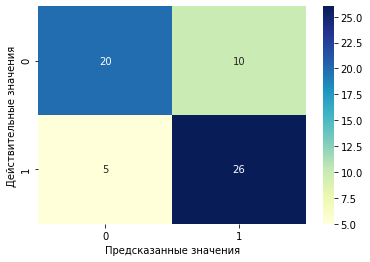

In [390]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_predsvc)), cmap="YlGnBu", annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [391]:
print(classification_report(y_test, y_predsvc))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Применим метод k - ближайших соседей

In [392]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [393]:
y_predK = classifier.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

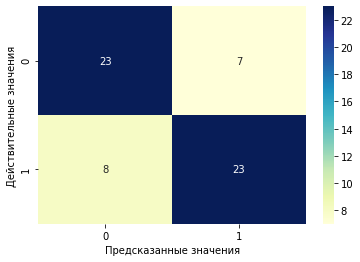

In [394]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_predK)), cmap="YlGnBu", annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [395]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predK))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.77      0.74      0.75        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



## Применим метод Наивного Байеса

In [396]:
from sklearn.naive_bayes import GaussianNB
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [397]:
y_predNaive = naivemodel.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

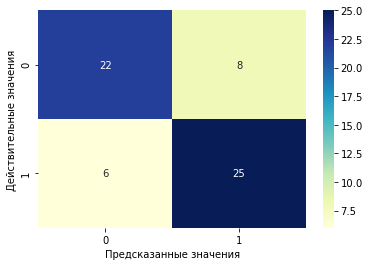

In [398]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_predNaive)), cmap="YlGnBu", annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [399]:
print(classification_report(y_test, y_predNaive))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [400]:
from sklearn.tree import DecisionTreeClassifier
treemodel = RandomForestClassifier(n_estimators=20, random_state=0)
treemodel.fit(X_train, y_train)
y_predtree = treemodel.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

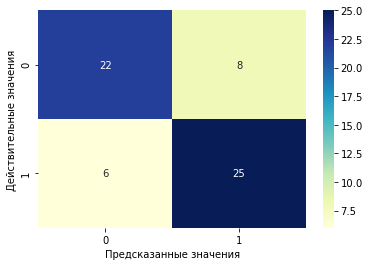

In [401]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_predtree)), cmap="YlGnBu", annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [402]:
print(classification_report(y_test, y_predtree))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

